In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
reviews_df=pd.read_csv('/content/drive/MyDrive/Final/전처리/labeled_data/final_combined_labeled.csv')

In [ ]:
reviews_df

,content,score,thumbsUpCount,at,appVersion,app_name,sentiment_label,new_content_cleaned_spelled,bareun,bareun_pos,Unnamed: 0
0,영어 교육 앱 중에는 최고네요. 잘 외워짐.,5,2,2020-01-01 8:24,1.0.78,voca,1.0,영어 교육 앱 중에는 최고네요 잘 외워짐,"['영어', '교육', '앱', '중', '에', '는', '최고', '이', '네...","[('영어', 'NNP'), ('교육', 'NNG'), ('앱', 'NNG'), (...",NaN
1,재밌네요 영어가 좋아져요,5,0,2020-01-04 2:13,2.1.2,speak,1.0,재밌네요 영어가 좋아져요,"['재밌', '네', '요', '영어', '가', '좋', '아', '지', '어요']","[('재밌', 'VA'), ('네', 'EF'), ('요', 'JX'), ('영어'...",NaN
2,듣고말하고연습이 매우좋습니다,5,0,2020-01-05 13:50,2.1.2,speak,1.0,듣고 말하고 연습이 매우 좋습니다,"['듣', '고', '말하', '고', '연습', '이', '매우', '좋', '습...","[('듣', 'VV'), ('고', 'EC'), ('말하', 'VV'), ('고',...",NaN
3,영어로 말하는게 재밌어요,4,0,2020-01-07 14:43,2.1.3,speak,1.0,영어로 말하는 게 재밌어요,"['영어', '로', '말하', '는', '거', '이', '재밌', '어요']","[('영어', 'NNP'), ('로', 'JKB'), ('말하', 'VV'), ('...",NaN
4,굿굿굿굿굿굿굿굿굿,5,0,2020-01-16 4:52,2.1.5,speak,1.0,굿굿,['굿굿'],"[('굿굿', 'NNG')]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
53539,학습을 재밌게 할 수 있을 것 같습니다.,5,0,2023-11-12 15:54,1.2.260,voca,1.0,학습을 재밌게 할 수 있을 것 같습니다,"['학습', '을', '재밌', '게', '하', 'ㄹ', '수', '있', '을'...","[('학습', 'NNG'), ('을', 'JKO'), ('재밌', 'VA'), ('...",38545.0
53540,좋으늑,5,0,2024-02-19 11:03,1.2.270,voca,1.0,좋으늑,"['좋', '으늑']","[('좋', 'VA'), ('으늑', 'EF')]",38546.0
53541,정말 잘만든 앱입니다,5,0,2021-02-06 11:47,1.1.52,voca,1.0,정말 잘 만든 앱입니다,"['정말', '잘', '만들', 'ㄴ', '앱', '이', 'ㅂ니다']","[('정말', 'MAG'), ('잘', 'MAG'), ('만들', 'VV'), ('...",38547.0
53542,전61년할머니입니다 그저감탄사만나옵니다 말해보카만드신분들께감사할뿐입니딘 화이팅 ^^,5,0,2021-07-12 9:08,1.1.66,voca,1.0,전 61년 할머니입니다 그저 감탄사만 나옵니다 말해 보카 만드신 분들께 감사할 뿐입...,"['저', 'ㄴ', '61', '년', '할머니', '이', 'ㅂ니다', '그저',...","[('저', 'NP'), ('ㄴ', 'JX'), ('61', 'SN'), ('년',...",38548.0


# SPEAK

In [ ]:
reviews_df['app_name'].unique()

array(['voca', 'speak', 'duo'], dtype=object)

---
## Speak 월별 감성 분포

In [ ]:
# Speak 데이터만 필터링
speak_data = reviews_df[reviews_df['app_name'] == 'speak']

# speak_data에 'year_month' 컬럼 추가 및 월별 감성 레이블 분석 적용
speak_data['year_month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')

# 년도-월별 긍정/중립/부정 레이블 개수 계산
monthly_sentiment_count_speak = speak_data.groupby(['year_month', 'sentiment_label']).size().unstack(fill_value=0)

# 결과 출력
monthly_sentiment_count_speak

<ipython-input-7-458e84101c76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['year_month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')


sentiment_label,-1.0,0.0,1.0
year_month,,,
2020-01,17,2,132
2020-02,24,0,99
2020-03,35,2,93
2020-04,20,1,63
2020-05,18,2,56
2020-06,20,0,51
2020-07,23,0,104
2020-08,22,1,63
2020-09,18,1,53


<ipython-input-5-465af7737d0d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')


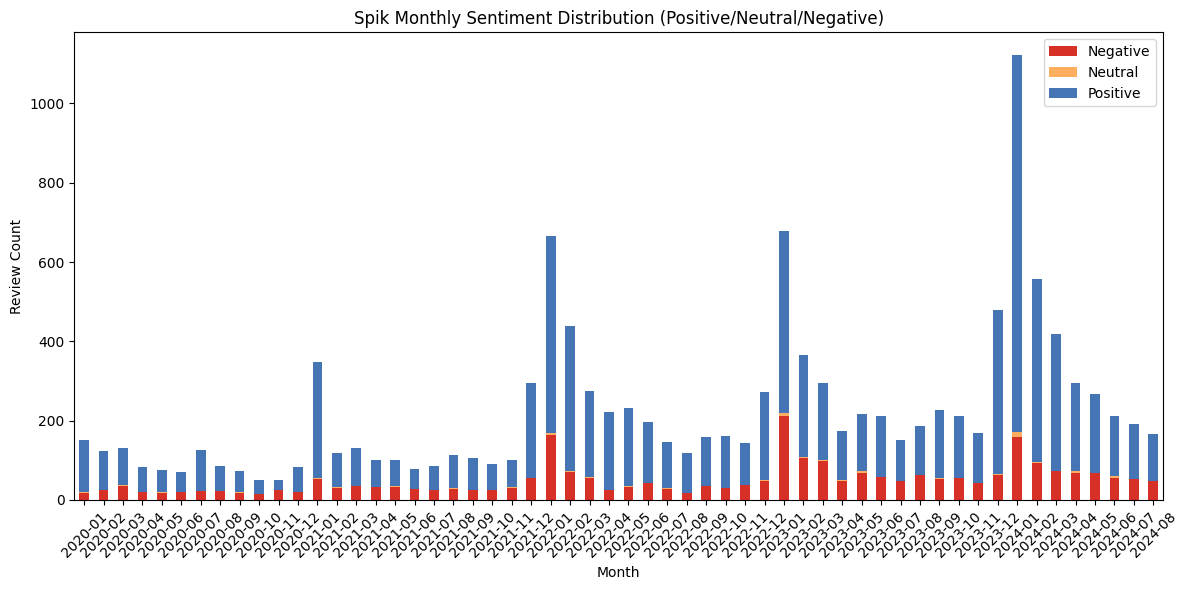

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Speak 데이터만 필터링
speak_data = reviews_df[reviews_df['app_name'] == 'speak']

# 'at' 컬럼에서 년도-월 정보 추출
speak_data['month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')

# 월별 긍정/중립/부정 레이블 개수 계산
monthly_sentiment = speak_data.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)

# 그래프 시각화 (색상 변경: RdYlBu)
colors = ['#d73027', '#fdae61', '#4575b4']  # Negative: Red, Neutral: Yellow, Positive: Blue

# 월별 총 리뷰 수에 따른 stacked bar chart 생성
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 그래프 세부 설정
plt.title('Spik Monthly Sentiment Distribution (Positive/Neutral/Negative)')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()  # 레이아웃 조정
plt.show()


<ipython-input-10-2c020024ae17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')


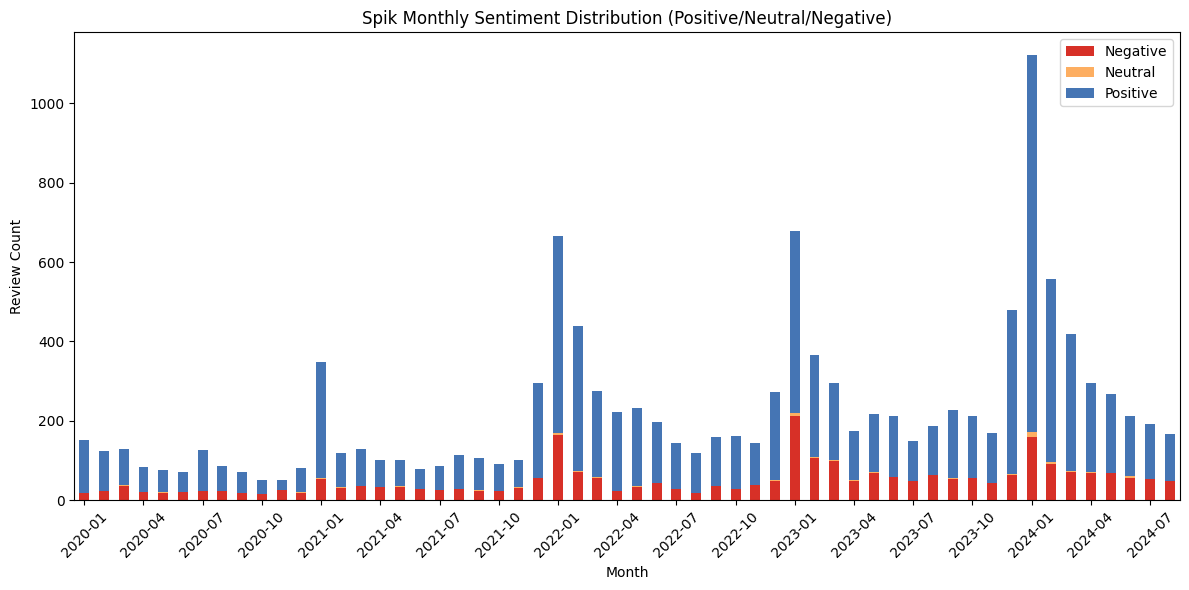

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Speak 데이터만 필터링
speak_data = reviews_df[reviews_df['app_name'] == 'speak']

# 'at' 컬럼에서 년도-월 정보 추출
speak_data['month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')

# 월별 긍정/중립/부정 레이블 개수 계산
monthly_sentiment = speak_data.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)

# 그래프 시각화 (색상 변경: RdYlBu)
colors = ['#d73027', '#fdae61', '#4575b4']  # Negative: Red, Neutral: Yellow, Positive: Blue

# 월별 총 리뷰 수에 따른 stacked bar chart 생성
ax = monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 그래프 세부 설정
plt.title('Spik Monthly Sentiment Distribution (Positive/Neutral/Negative)')
plt.xlabel('Month')
plt.ylabel('Review Count')

# x축 레이블을 3개월 간격으로 표시
ticks = np.arange(0, len(monthly_sentiment.index), step=3)
plt.xticks(ticks=ticks, labels=monthly_sentiment.index[ticks], rotation=45)

plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 앱 버젼별

---
모든 버전 말고 주요버전만 표시

<ipython-input-12-35a5791d9468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['version_group'] = speak_data['appVersion'].str.extract(r'(\d\.\d)').fillna('Other')


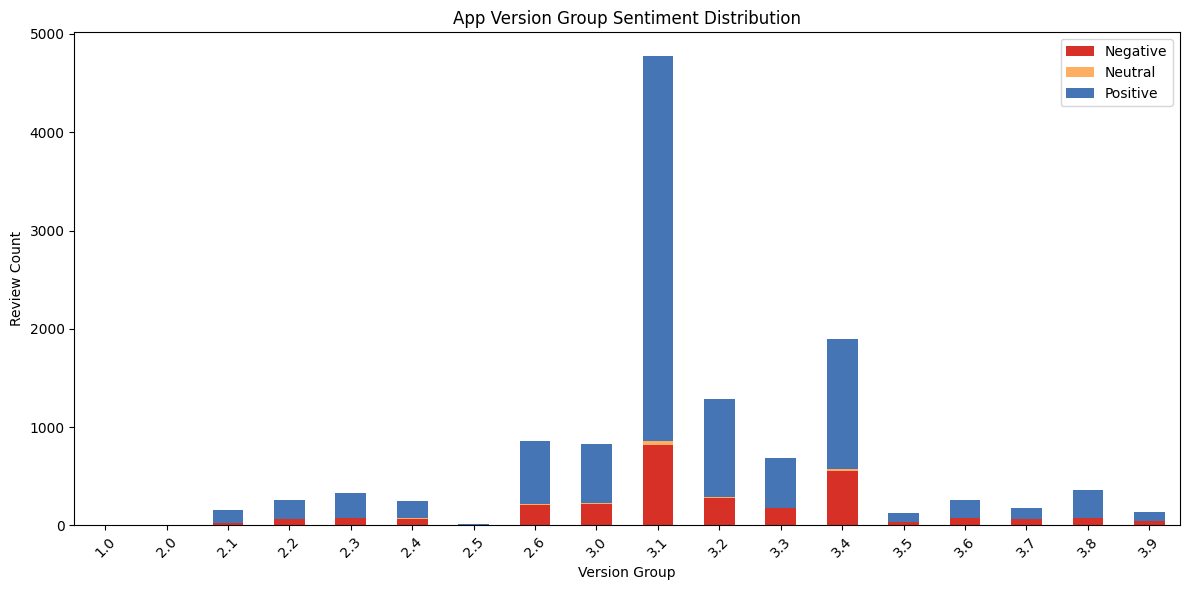

In [ ]:
# 주요 버전 그룹화 (2.x, 3.x 등)
speak_data['version_group'] = speak_data['appVersion'].str.extract(r'(\d\.\d)').fillna('Other')

# 버전 그룹별 긍정/중립/부정 비율 분석
version_group_sentiment = speak_data.groupby(['version_group', 'sentiment_label']).size().unstack(fill_value=0)
version_group_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 그래프 세부 설정
plt.title('App Version Group Sentiment Distribution')
plt.xlabel('Version Group')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()
plt.show()


- 3.1버전 그룹에서 리뷰가 가장 많음(긍/부정 모두 포함)
- 대부분의 버전에서 긍정적인 리뷰가 우세

---
상위 10개 버전별 감성 분포

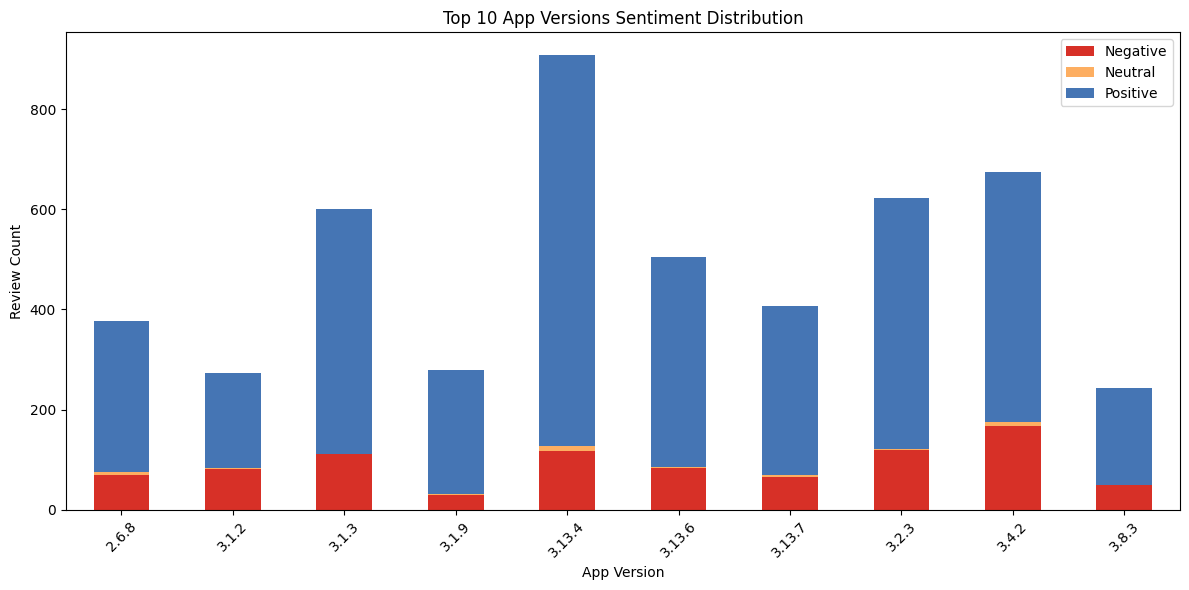

In [ ]:
# 앱 버전별 리뷰 개수 상위 10개 버전 필터링
top_versions = speak_data['appVersion'].value_counts().nlargest(10).index
top_version_data = speak_data[speak_data['appVersion'].isin(top_versions)]

# 상위 10개 버전에 대해 긍정/중립/부정 비율 분석
version_sentiment = top_version_data.groupby(['appVersion', 'sentiment_label']).size().unstack(fill_value=0)
version_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 그래프 세부 설정
plt.title('Top 10 App Versions Sentiment Distribution')
plt.xlabel('App Version')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()
plt.show()


- 3.13.4 버전이 리뷰 수가 가장 많음. 긍정적인 리뷰 비율이 높음
- 3.1 그룹에 가장 많은 리뷰가 있음

## 리뷰 점수와 감성 레이블 간의 상관관계

In [ ]:
# 리뷰 점수와 감성 레이블 간의 상관관계를 분석하기 위해 각 점수별로 감성 레이블의 평균을 확인
score_sentiment_correlation = speak_data.groupby('score')['sentiment_label'].mean()

# 결과 출력
score_sentiment_correlation

,sentiment_label
score,
1,-0.872727
2,-0.879747
3,-0.686335
4,0.245639
5,0.874366


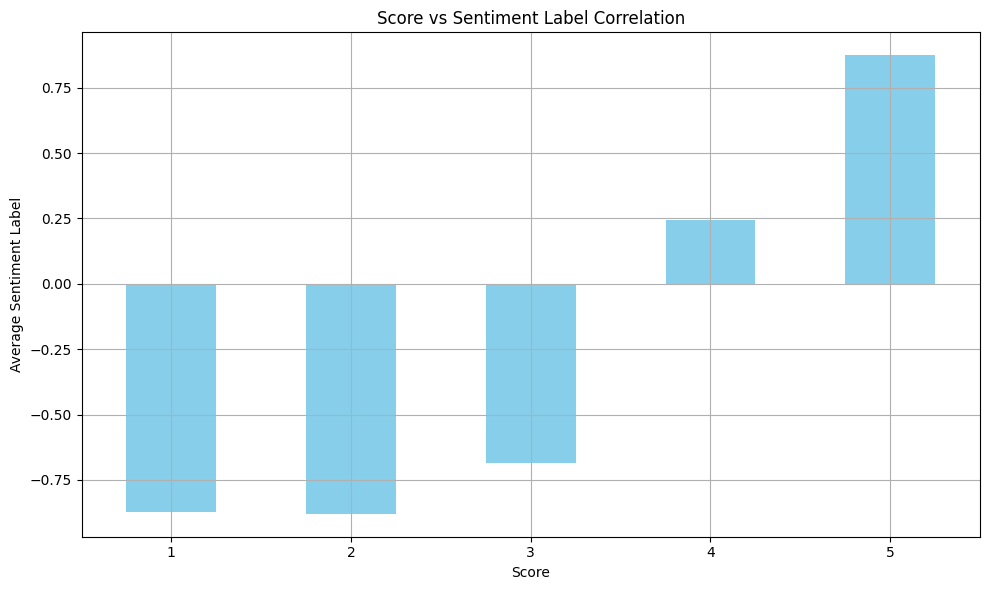

In [ ]:
import matplotlib.pyplot as plt

# 점수와 감성 레이블 간의 상관관계를 그래프로 시각화
score_sentiment_correlation.plot(kind='bar', figsize=(10, 6), color='skyblue')

# 그래프 세부 설정
plt.title('Score vs Sentiment Label Correlation')
plt.xlabel('Score')
plt.ylabel('Average Sentiment Label')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

- 점수가 낮을수록 부정적인 감정을 많이 담고 있음
- 점수가 높을수록 긍정적인 감정을 많이 담고 있음

  = 점수가 높을수록 긍정적인 리뷰가 많고, 점수가 낮을수록 부정적인 리뷰가 많음

버전 그룹별 평균 점수

<ipython-input-19-d8e4208419c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['version_group'] = speak_data['appVersion'].str.extract(r'(\d\.\d)').fillna('Other')


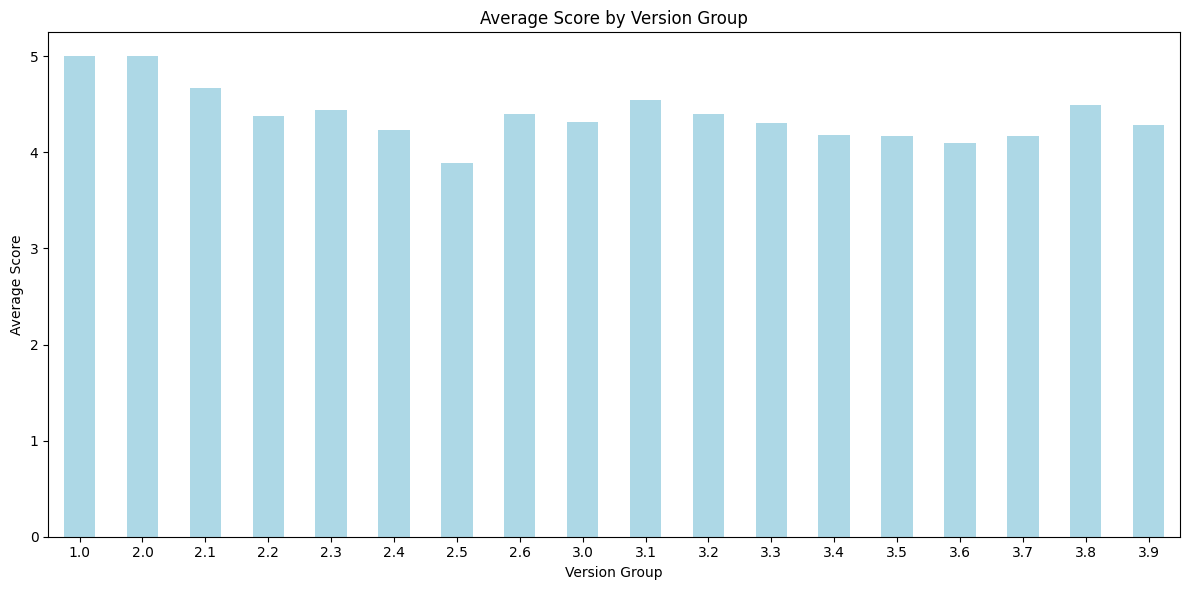

In [ ]:
# 버전 그룹화 (2.x, 3.x 등)
speak_data['version_group'] = speak_data['appVersion'].str.extract(r'(\d\.\d)').fillna('Other')

# 버전 그룹별 평균 점수 계산
version_group_score_avg = speak_data.groupby('version_group')['score'].mean()

# 그래프 시각화
version_group_score_avg.plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title('Average Score by Version Group')
plt.xlabel('Version Group')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 초반 평균 점수가 더 좋음
- 2.x 후반 점수가 좀 낮아ㅡㅁ
- 3.1 버전에서 살짝 오르다 그 후에는 균일한 점수

앱 버전별 평균 점수(꺾은선 그래프)

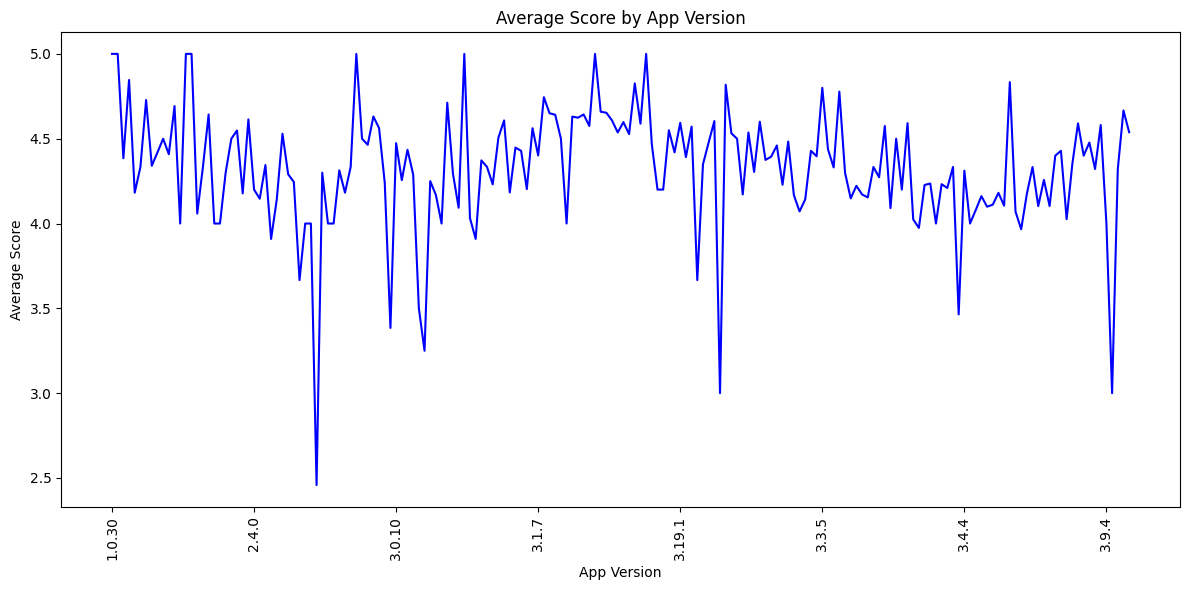

In [ ]:
# 버전별 평균 점수 계산 (꺾은선 그래프)
version_score_avg.plot(kind='line', figsize=(12, 6), color='blue')
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- 전반적으로 4-5점 사이에서 움직임
- 몇몇 버전에서 평균 점수가 급격히 떨어지는 구간이 있음

시간에 따른 평균 점수 변화

<ipython-input-11-9f1041157985>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['year_month_str'] = speak_data['year_month'].dt.strftime('%Y-%m')


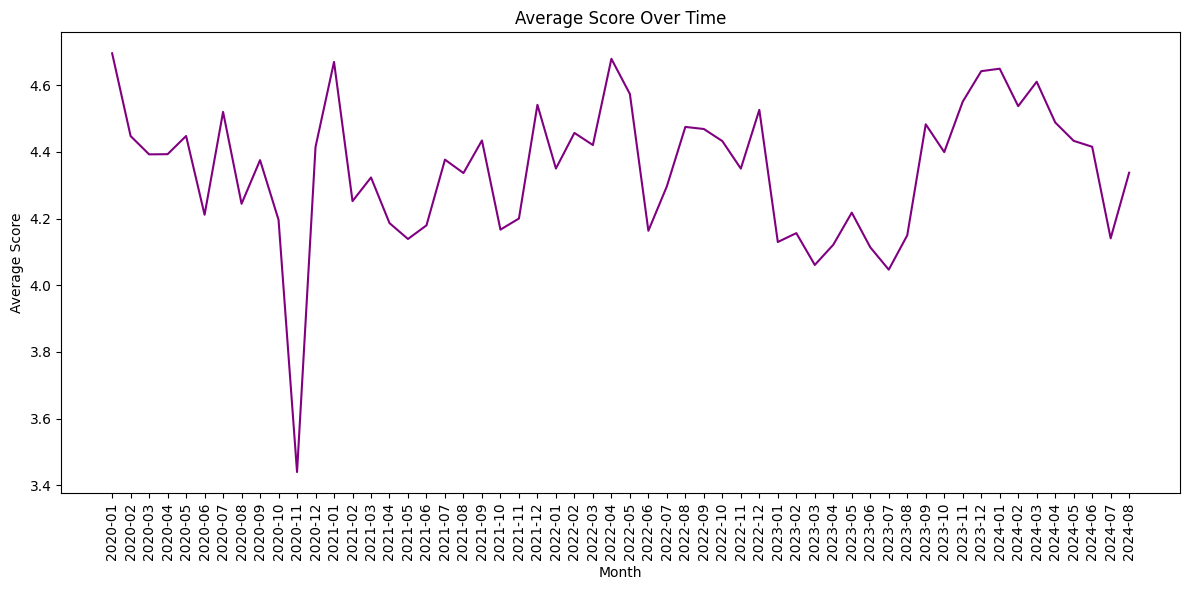

In [ ]:
import numpy as np

# 'year_month'을 문자열로 변환하여 년-월 형식으로 표시
speak_data['year_month_str'] = speak_data['year_month'].dt.strftime('%Y-%m')

# 월별 평균 점수 계산
monthly_score_avg = speak_data.groupby('year_month_str')['score'].mean()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_score_avg.index, monthly_score_avg.values, color='purple')

# 그래프 세부 설정
plt.title('Average Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Score')

# 모든 연-월을 x축에 표시
plt.xticks(ticks=np.arange(len(monthly_score_avg.index)), labels=monthly_score_avg.index, rotation=90)

plt.tight_layout()
plt.show()

- 2020년 11월 큰 하락
- 2023년 초반~중반 사이에 하락
- 전반적으로 사용자의 평균 점수가 긍정적인 범위

<ipython-input-9-9e5b7e021045>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['year_month_str'] = speak_data['year_month'].dt.strftime('%Y-%m')


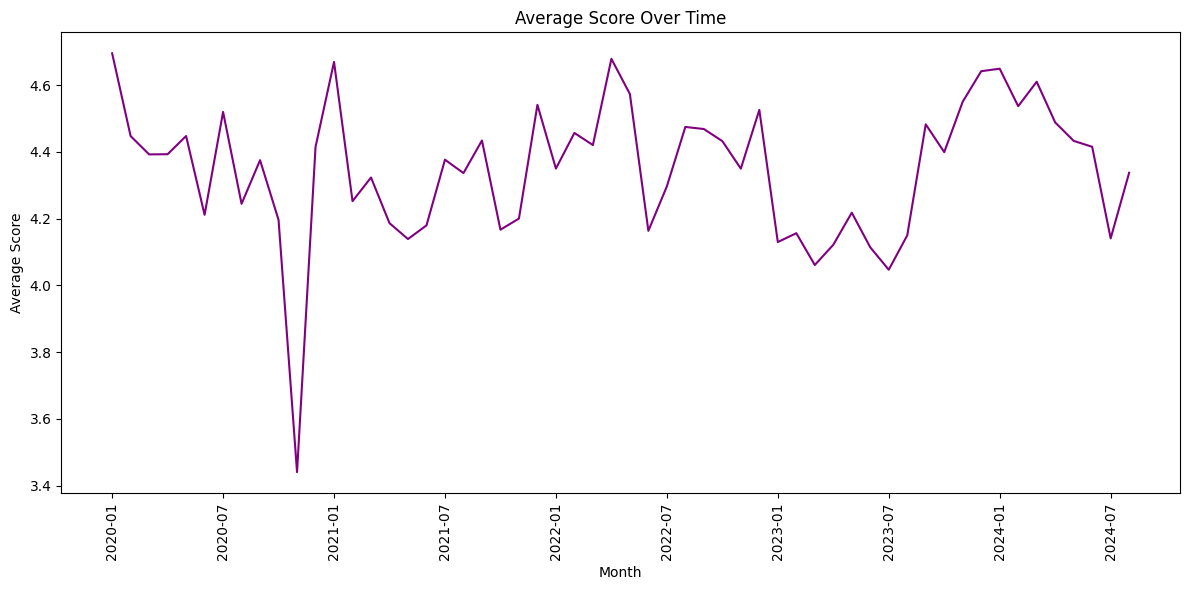

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 'year_month'을 문자열로 변환하여 년-월 형식으로 표시
speak_data['year_month_str'] = speak_data['year_month'].dt.strftime('%Y-%m')

# 월별 평균 점수 계산
monthly_score_avg = speak_data.groupby('year_month_str')['score'].mean()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_score_avg.index, monthly_score_avg.values, color='purple')

# 그래프 세부 설정
plt.title('Average Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Score')

# 6개월 간격으로 x축에 날짜 표시 (x축 간격을 6개월로 설정)
step = 6
plt.xticks(ticks=np.arange(0, len(monthly_score_avg.index), step),
           labels=monthly_score_avg.index[::step], rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-14-74208589aa68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['year_month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')
<ipython-input-14-74208589aa68>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speak_data['year_month_str'] = speak_data['year_month'].dt.strftime('%Y-%m')


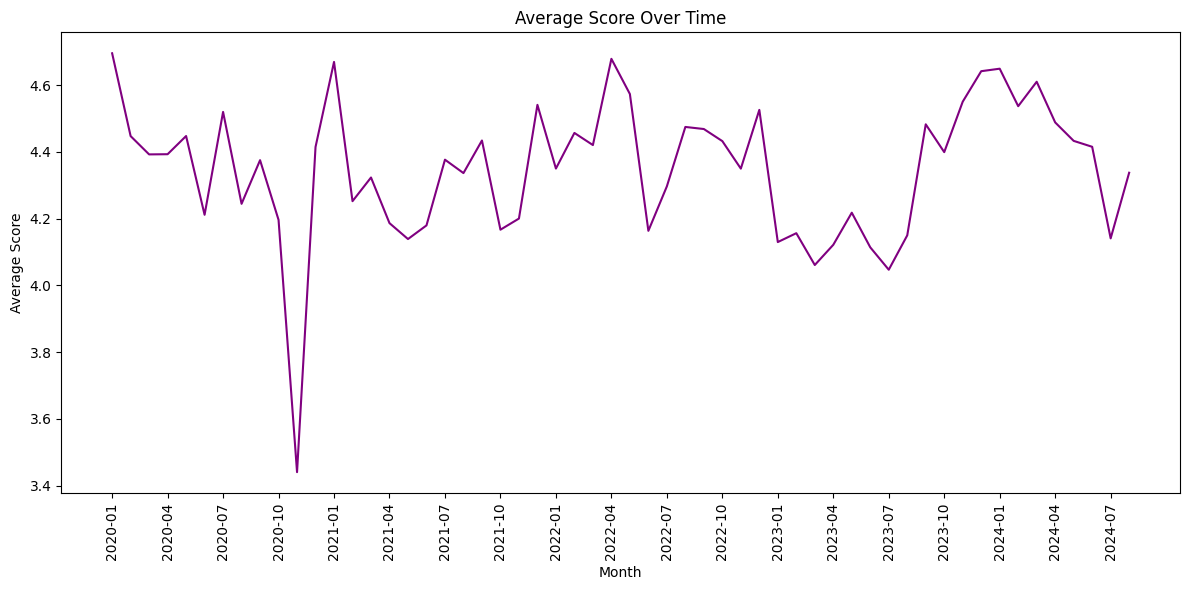

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 'at' 컬럼에서 'year_month' 정보를 추출 (연월 정보만 추출)
speak_data['year_month'] = pd.to_datetime(speak_data['at']).dt.to_period('M')

# 'year_month'을 문자열로 변환하여 년-월 형식으로 표시
speak_data['year_month_str'] = speak_data['year_month'].dt.strftime('%Y-%m')

# 월별 평균 점수 계산
monthly_score_avg = speak_data.groupby('year_month_str')['score'].mean()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_score_avg.index, monthly_score_avg.values, color='purple')

# 그래프 세부 설정
plt.title('Average Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Score')

# 3개월 간격으로 x축에 날짜 표시 (x축 간격을 3개월로 설정)
step = 3
plt.xticks(ticks=np.arange(0, len(monthly_score_avg.index), step),
           labels=monthly_score_avg.index[::step], rotation=90)

plt.tight_layout()
plt.show()

감성 레이블에 따른 평균 좋아요 수

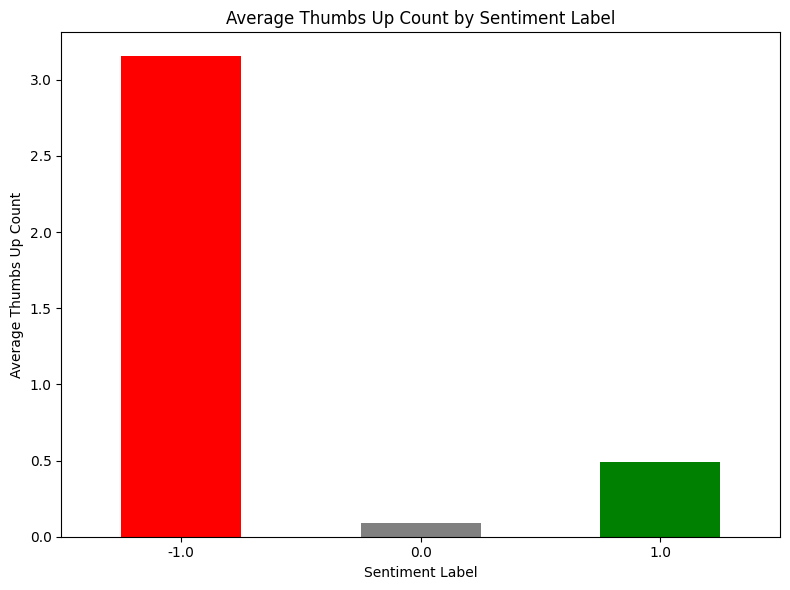

In [ ]:
# 좋아요 수와 감성 레이블의 관계 분석 (좋아요 수 상위 10개)
thumbsUp_sentiment = speak_data.groupby('sentiment_label')['thumbsUpCount'].mean()

# 그래프 시각화
thumbsUp_sentiment.plot(kind='bar', figsize=(8, 6), color=['red', 'gray', 'green'])
plt.title('Average Thumbs Up Count by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Thumbs Up Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 부정적인 감성 레이블이 가장 많은 좋아요를 받음
- 평균적으로 부정적인 리뷰는 3개 이상의 좋아요를 받음
- 부정적인 리뷰가 더 많은 사용자들의 공감을 얻음을 확인할 수 있음

점수에 따른 평균 좋아요 수

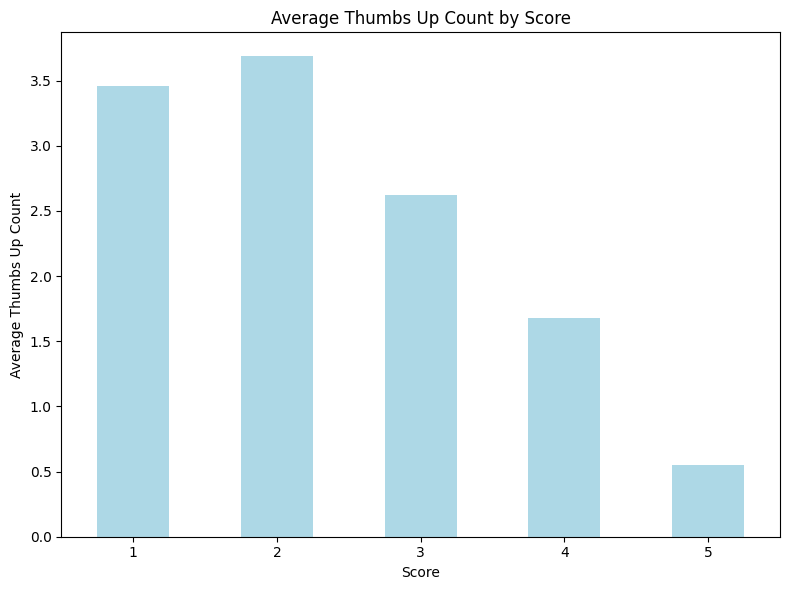

In [ ]:
# 점수와 좋아요 수의 관계 분석
score_thumbsUp = speak_data.groupby('score')['thumbsUpCount'].mean()

# 그래프 시각화
score_thumbsUp.plot(kind='bar', figsize=(8, 6), color='lightblue')
plt.title('Average Thumbs Up Count by Score')
plt.xlabel('Score')
plt.ylabel('Average Thumbs Up Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 1점&2점 리뷰가 가장 많은 좋아요를 받음
- 부정적인 점수를 준 리뷰가 다른 사용자들의 공감을 얻음을 확인